In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_excel("coffe shop data python analysis.xlsx")

df.head()

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,product_category,product_type,product_detail,Size,Total bill,Month Name,Day Name,Hour,Day of Week,Month
0,1,2023-01-01,07:06:11,5,Lower Manhattan,32,2,3.0,Coffee,Gourmet brewed coffee,Ethiopia,Regular,6.0,January,Sunday,7,0,1
1,2,2023-01-01,07:08:56,5,Lower Manhattan,57,2,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai,Large,6.2,January,Sunday,7,0,1
2,3,2023-01-01,07:14:04,5,Lower Manhattan,59,2,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate,Large,9.0,January,Sunday,7,0,1
3,4,2023-01-01,07:20:24,5,Lower Manhattan,22,1,2.0,Coffee,Drip coffee,Our Old Time Diner Blend,Small,2.0,January,Sunday,7,0,1
4,5,2023-01-01,07:22:41,5,Lower Manhattan,57,2,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai,Large,6.2,January,Sunday,7,0,1


In [11]:
missing_values = df.isnull().sum()
print(missing_values)

transaction_id      0
transaction_date    0
transaction_time    0
store_id            0
store_location      0
product_id          0
transaction_qty     0
unit_price          0
product_category    0
product_type        0
product_detail      0
Size                0
Total bill          0
Month Name          0
Day Name            0
Hour                0
Day of Week         0
Month               0
dtype: int64


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype          
---  ------            --------------   -----          
 0   transaction_id    149116 non-null  int64          
 1   transaction_date  149116 non-null  datetime64[ns] 
 2   transaction_time  149116 non-null  timedelta64[ns]
 3   store_id          149116 non-null  int64          
 4   store_location    149116 non-null  object         
 5   product_id        149116 non-null  int64          
 6   transaction_qty   149116 non-null  int64          
 7   unit_price        149116 non-null  float64        
 8   product_category  149116 non-null  object         
 9   product_type      149116 non-null  object         
 10  product_detail    149116 non-null  object         
 11  Size              149116 non-null  object         
 12  Total bill        149116 non-null  float64        
 13  Month Name        149116 non-null  object   

In [13]:
df['transaction_time'] = df['transaction_time'].astype(str)
df['transaction_time'] = pd.to_timedelta(df['transaction_time'])

In [18]:
df[['transaction_qty','unit_price','Total bill','Hour']].describe()

,transaction_qty,unit_price,Total bill,Hour
count,149116.000000,149116.000000,149116.000000,149116.000000
mean,1.438276,3.382219,4.686367,11.735790
std,0.542509,2.658723,4.227099,3.764662
min,1.000000,0.800000,0.800000,6.000000
25%,1.000000,2.500000,3.000000,9.000000
50%,1.000000,3.000000,3.750000,11.000000
75%,2.000000,3.750000,6.000000,15.000000
max,8.000000,45.000000,360.000000,20.000000


In [82]:
df_location = df.groupby('store_location').agg({
    'Total bill':'sum',
    'transaction_id':'count'
})
print(df_location)

                 Total bill  transaction_id
store_location                             
Astoria           232243.91           50599
Hell's Kitchen    236511.17           50735
Lower Manhattan   230057.25           47782


In [83]:
daily_sales_by_location = df.groupby(['transaction_date','store_location'])['Total bill'].sum().unstack()

print(daily_sales_by_location)

store_location    Astoria  Hell's Kitchen  Lower Manhattan
transaction_date                                          
2023-01-01         868.40          851.45           788.35
2023-01-02         925.50          828.80           649.05
2023-01-03         902.75          906.25           756.00
2023-01-04         808.25          781.65           630.20
2023-01-05         903.05          714.90           800.90
...                   ...             ...              ...
2023-06-26        1975.10         1746.10          2154.70
2023-06-27        1861.55         1676.70          2437.40
2023-06-28        1758.10         1445.85          1524.95
2023-06-29        1852.75         1298.55          1299.45
2023-06-30        1807.65         1904.93          1768.74

[181 rows x 3 columns]


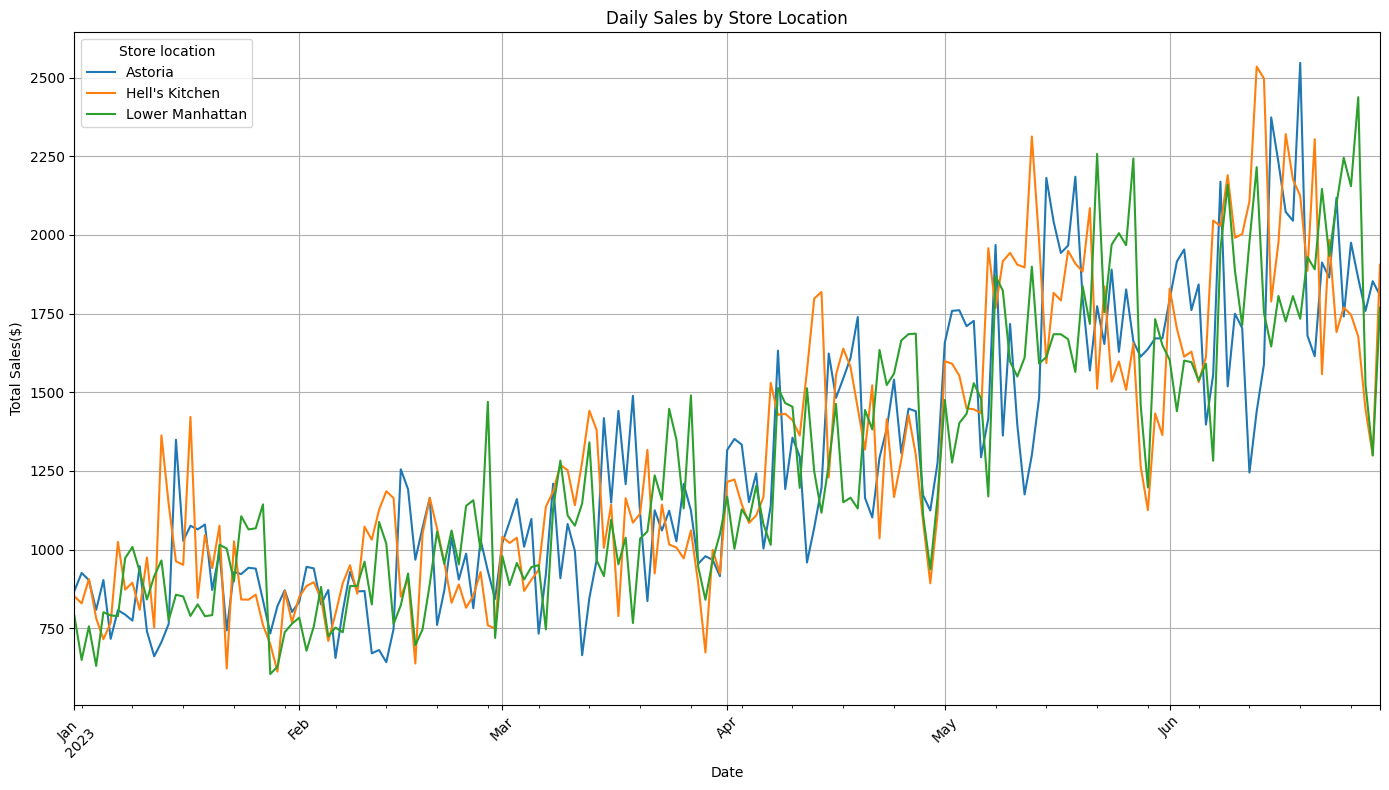

In [109]:
daily_sales_by_location.plot(figsize=(14,8), title='Daily Sales by Store Location')
plt.xlabel('Date')
plt.ylabel('Total Sales($)')
plt.legend(title='Store location')
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

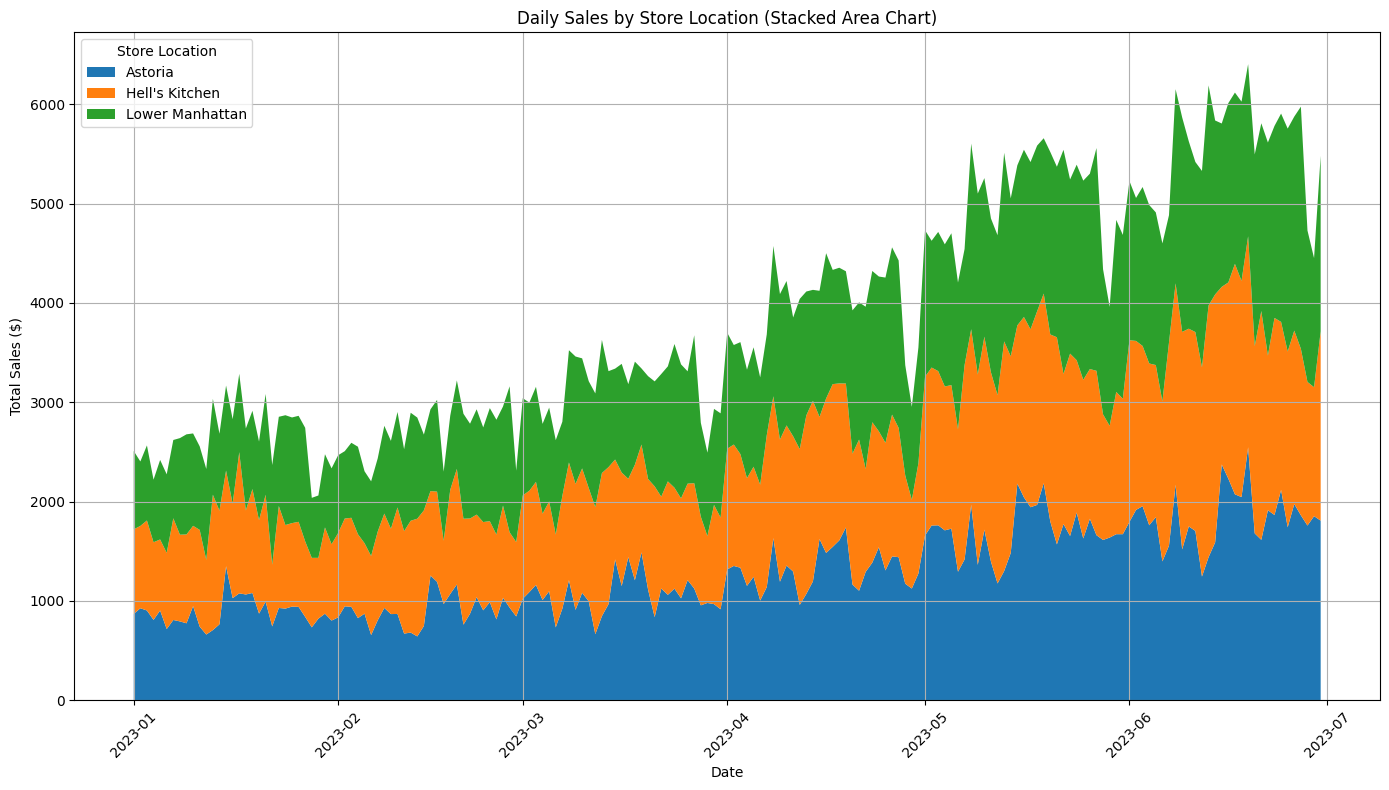

In [85]:
plt.figure(figsize=(14,8))

plt.stackplot(daily_sales_by_location.index, daily_sales_by_location.T, labels=daily_sales_by_location.columns)

plt.title('Daily Sales by Store Location (Stacked Area Chart)')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.legend(title='Store Location', loc='upper left')
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [86]:
# Ensure transaction_date is in datetime format
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# Calculate daily sales
daily_sales = df.groupby('transaction_date')['Total bill'].sum().reset_index()

# Add Day of Week
df['Day of Week'] = df['transaction_date'].dt.day_name()

# Calculate weekly sales
weekly_sales = df.groupby('Day of Week')['Total bill'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).reset_index()

# Add Month
df['month'] = df['transaction_date'].dt.to_period('M')

# Calculate monthly sales
monthly_sales = df.groupby('month')['Total bill'].sum().reset_index()

# View results
daily_sales, weekly_sales, monthly_sales

(    transaction_date  Total bill
 0         2023-01-01     2508.20
 1         2023-01-02     2403.35
 2         2023-01-03     2565.00
 3         2023-01-04     2220.10
 4         2023-01-05     2418.85
 ..               ...         ...
 176       2023-06-26     5875.90
 177       2023-06-27     5975.65
 178       2023-06-28     4728.90
 179       2023-06-29     4450.75
 180       2023-06-30     5481.32
 
 [181 rows x 2 columns],
   Day of Week  Total bill
 0      Monday   101677.28
 1     Tuesday    99455.94
 2   Wednesday   100313.54
 3    Thursday   100767.78
 4      Friday   101373.00
 5    Saturday    96894.48
 6      Sunday    98330.31,
      month  Total bill
 0  2023-01    81677.74
 1  2023-02    76145.19
 2  2023-03    98834.68
 3  2023-04   118941.08
 4  2023-05   156727.76
 5  2023-06   166485.88)

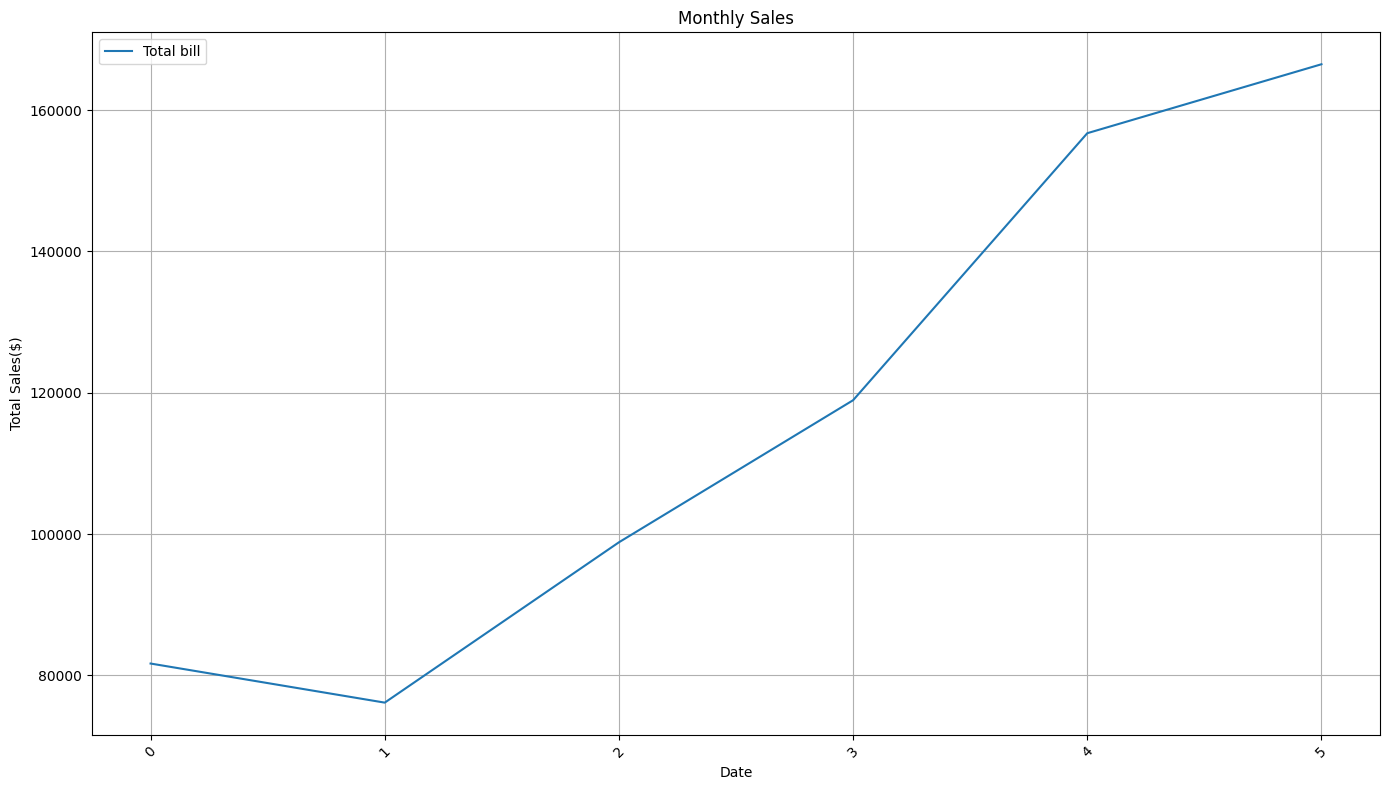

In [87]:
monthly_sales.plot(figsize=(14,8), title='Monthly Sales')
                   
plt.xlabel('Date')
plt.ylabel('Total Sales($)')
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
                   
plt.show()

In [88]:
weekly_sales = df.groupby(['Day of Week','store_location'])['Total bill'].sum().unstack()

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_sales = weekly_sales.reindex(days_order)

weekly_sales

store_location,Astoria,Hell's Kitchen,Lower Manhattan
Day of Week,,,
Monday,33928.29,33389.51,34359.48
Tuesday,31816.76,34846.47,32792.71
Wednesday,34244.63,33779.09,32289.82
Thursday,34140.37,33468.06,33159.35
Friday,33472.75,34743.18,33157.07
Saturday,31845.93,32599.23,32449.32
Sunday,32795.18,33685.63,31849.50


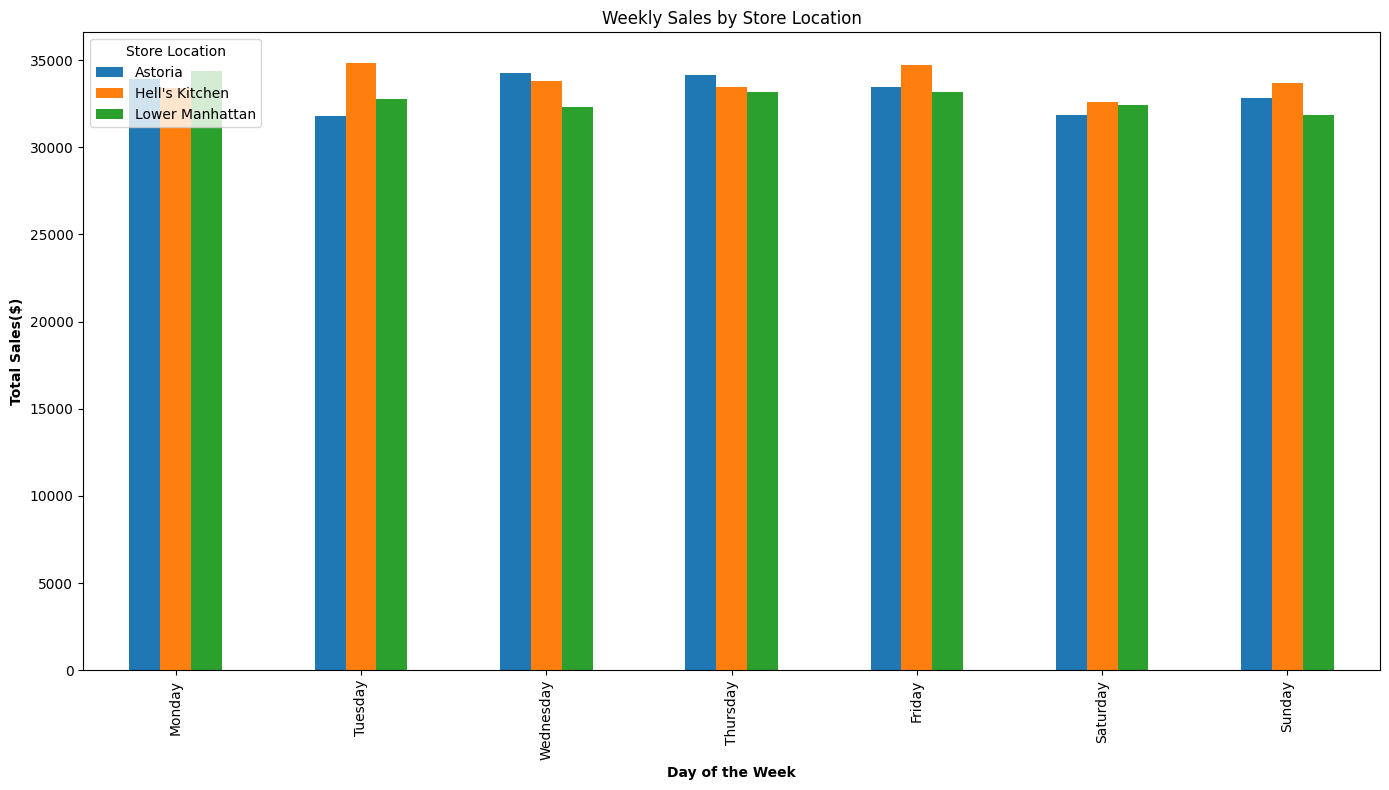

In [89]:
weekly_sales[["Astoria","Hell's Kitchen","Lower Manhattan"]].plot(kind='bar',figsize=(14,8))

plt.xlabel('Day of the Week', fontweight='bold')
plt.ylabel('Total Sales($)', fontweight='bold')
plt.title('Weekly Sales by Store Location')
plt.legend(title='Store Location', loc='upper left')

plt.tight_layout()
plt.show()

In [90]:
df_category = df.groupby('product_category').agg({
    'Total bill':'sum',
    'transaction_id':'count'
}).sort_values('Total bill', ascending=False)

print(df_category)

                    Total bill  transaction_id
product_category                              
Coffee               269952.45           58416
Tea                  196405.95           45449
Bakery                82315.64           22796
Drinking Chocolate    72416.00           11468
Coffee beans          40085.25            1753
Branded               13607.00             747
Loose Tea             11213.60            1210
Flavours               8408.80            6790
Packaged Chocolate     4407.64             487


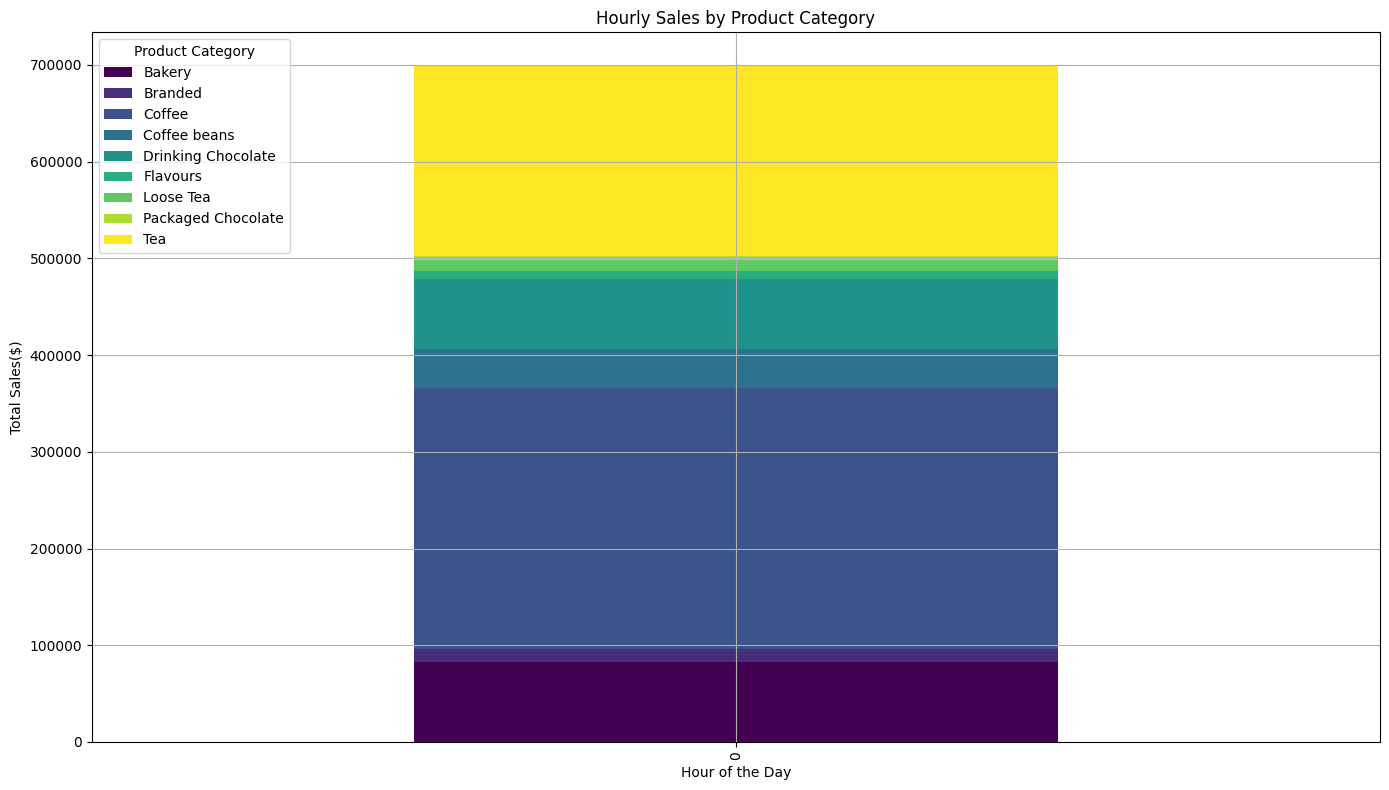

In [98]:
df['hour'] = df['transaction_date'].dt.hour

hourly_sales_by_product = df.groupby(['hour','product_category'])['Total bill'].sum().unstack()

hourly_sales_by_product.plot(kind='bar',stacked=True, figsize=(14,8), colormap='viridis')

plt.title('Hourly Sales by Product Category')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales($)')
plt.legend(title='Product Category', loc='upper left')
plt.grid(True)
plt.tight_layout()

plt.show()

In [99]:
df_category['avg_sales'] = df_category['Total bill']/df_category['transaction_id']
df_category

,Total bill,transaction_id,avg_sales
product_category,,,
Coffee,269952.45,58416,4.621207
Tea,196405.95,45449,4.321458
Bakery,82315.64,22796,3.610969
Drinking Chocolate,72416.00,11468,6.314615
Coffee beans,40085.25,1753,22.866657
Branded,13607.00,747,18.215529
Loose Tea,11213.60,1210,9.267438
Flavours,8408.80,6790,1.238409
Packaged Chocolate,4407.64,487,9.050595


In [100]:
sales_by_product = df.groupby('product_type').agg({
    'Total bill':'sum',
    'unit_price':'mean'
}).sort_values('Total bill', ascending=False)

print(sales_by_product)

                       Total bill  unit_price
product_type                                 
Barista Espresso         91406.20    3.655200
Brewed Chai tea          77081.95    2.936993
Hot chocolate            72416.00    4.148827
Gourmet brewed coffee    70034.60    2.696641
Brewed Black tea         47932.00    2.744670
Brewed herbal tea        47539.50    2.744731
Premium brewed coffee    38781.15    3.122452
Organic brewed coffee    37746.50    2.898021
Scone                    36866.12    3.534638
Drip coffee              31984.00    2.484959
Pastry                   25655.99    3.685979
Brewed Green tea         23852.50    2.742462
Biscotti                 19793.53    3.419503
Premium Beans            14583.50   34.028274
Organic Beans             8509.50   20.287952
Housewares                7444.00   13.448669
Gourmet Beans             6798.00   18.573770
Clothing                  6163.00   27.886878
Regular syrup             6084.80    0.800000
Espresso Beans            5560.25 

In [101]:
product_sales_df = df.groupby(['product_category','product_type'])['Total bill'].sum().reset_index()
product_sales_df

,product_category,product_type,Total bill
0,Bakery,Biscotti,19793.53
1,Bakery,Pastry,25655.99
2,Bakery,Scone,36866.12
3,Branded,Clothing,6163.00
4,Branded,Housewares,7444.00
5,Coffee,Barista Espresso,91406.20
6,Coffee,Drip coffee,31984.00
7,Coffee,Gourmet brewed coffee,70034.60
8,Coffee,Organic brewed coffee,37746.50
9,Coffee,Premium brewed coffee,38781.15


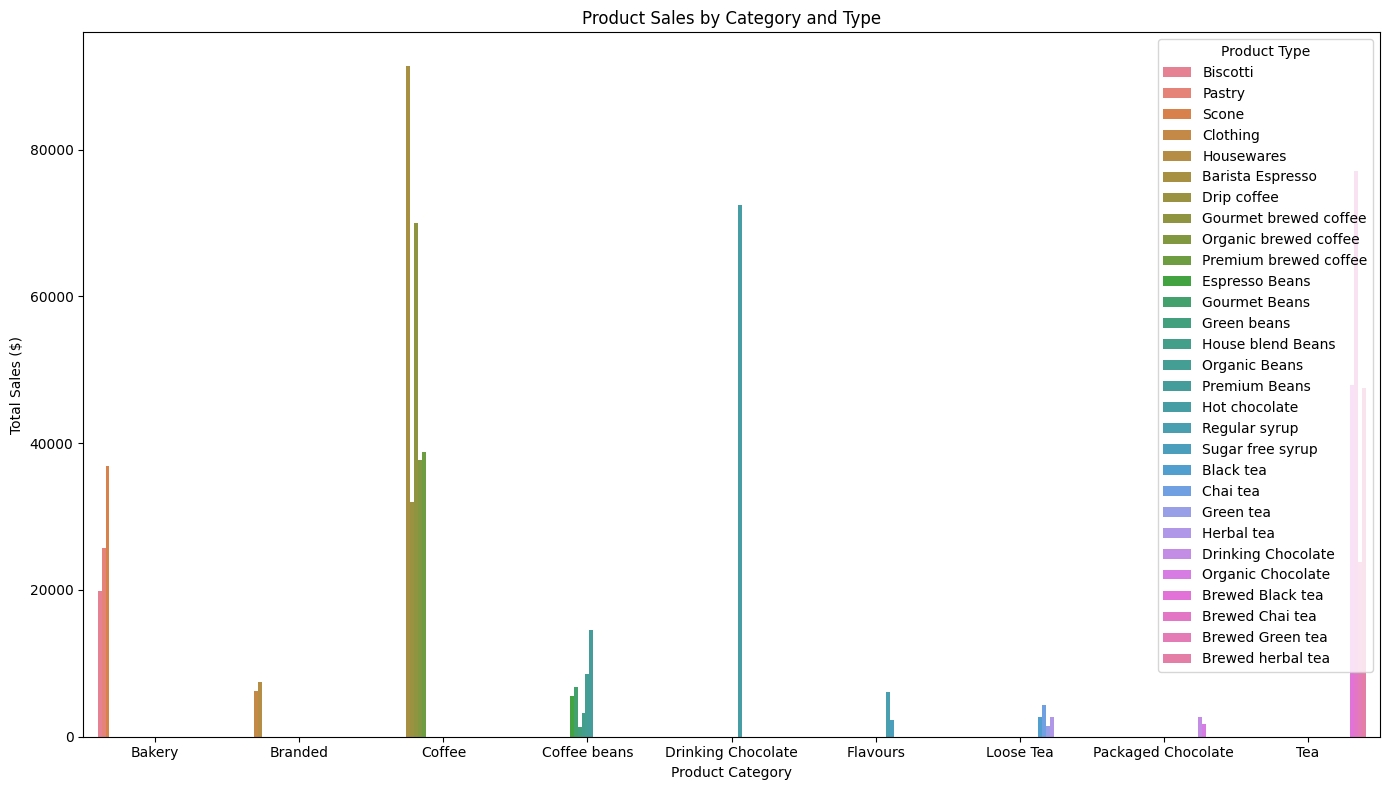

In [102]:
plt.figure(figsize=(14,8))
sns.barplot(data=product_sales_df, x='product_category', y='Total bill', hue='product_type')

plt.title('Product Sales by Category and Type')
plt.xlabel('Product Category')
plt.ylabel('Total Sales ($)')
plt.legend(title='Product Type', loc='upper right')

plt.tight_layout()
plt.show()

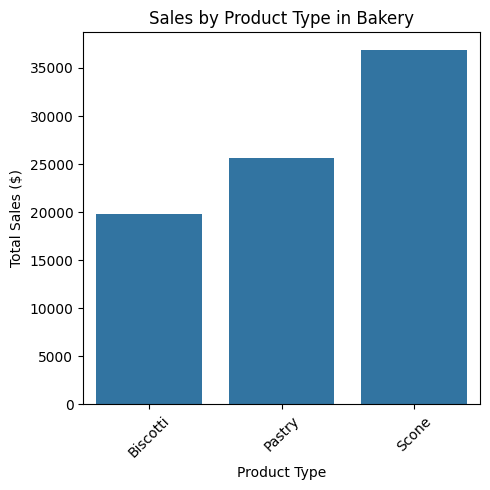

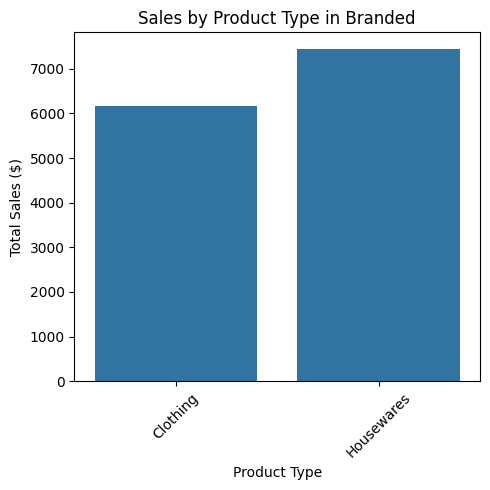

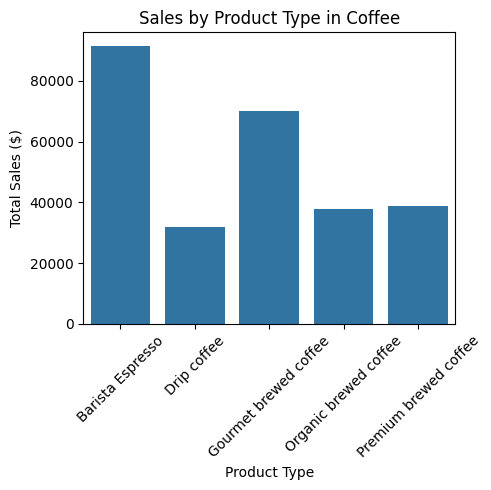

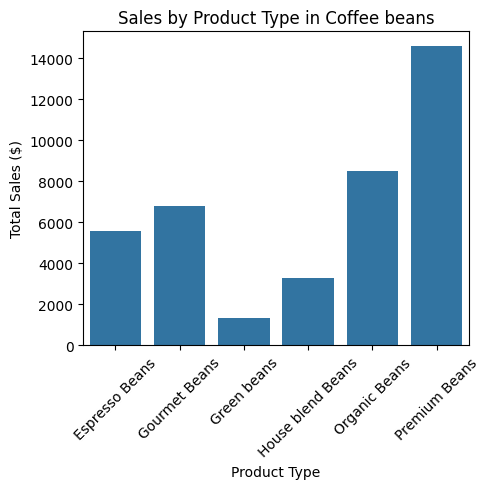

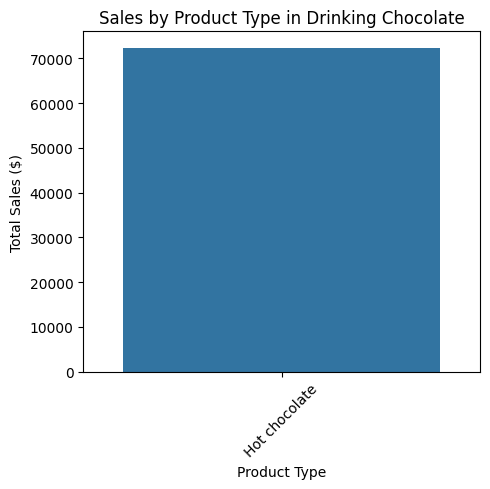

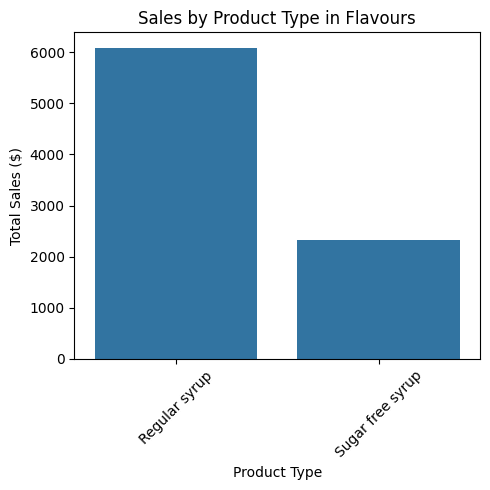

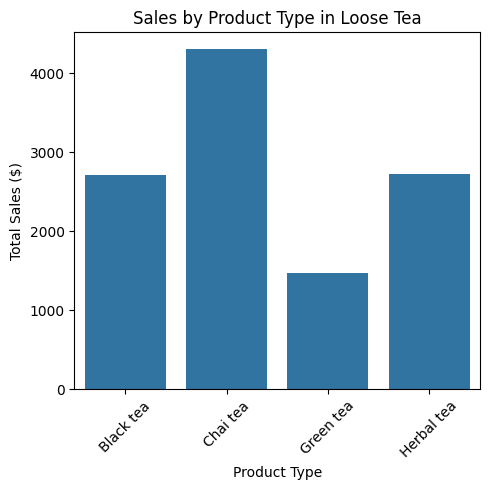

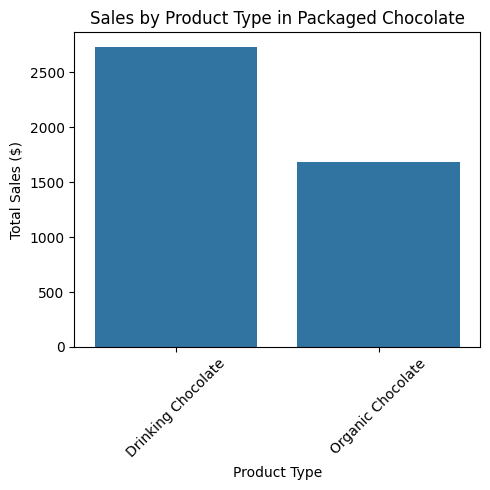

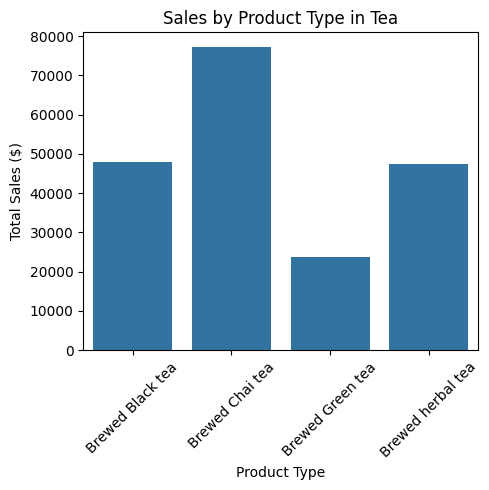

In [103]:
categories = product_sales_df['product_category'].unique()

for category in categories:
    plt.figure(figsize=(5,5))
    category_data = product_sales_df[product_sales_df['product_category'] == category]
    sns.barplot(data=category_data, x='product_type', y='Total bill')

    plt.title(f'Sales by Product Type in {category}')
    plt.xlabel('Product Type')
    plt.ylabel('Total Sales ($)')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

In [106]:
hourly_sales_by_location = df.groupby(['store_location','Hour'])['Total bill'].sum().reset_index()

hourly_sales_by_location

,store_location,Hour,Total bill
0,Astoria,7,19028.80
1,Astoria,8,22805.90
2,Astoria,9,23183.57
3,Astoria,10,24426.12
4,Astoria,11,15498.13
5,Astoria,12,15681.20
6,Astoria,13,15947.87
7,Astoria,14,15175.27
8,Astoria,15,15651.95
9,Astoria,16,16110.85


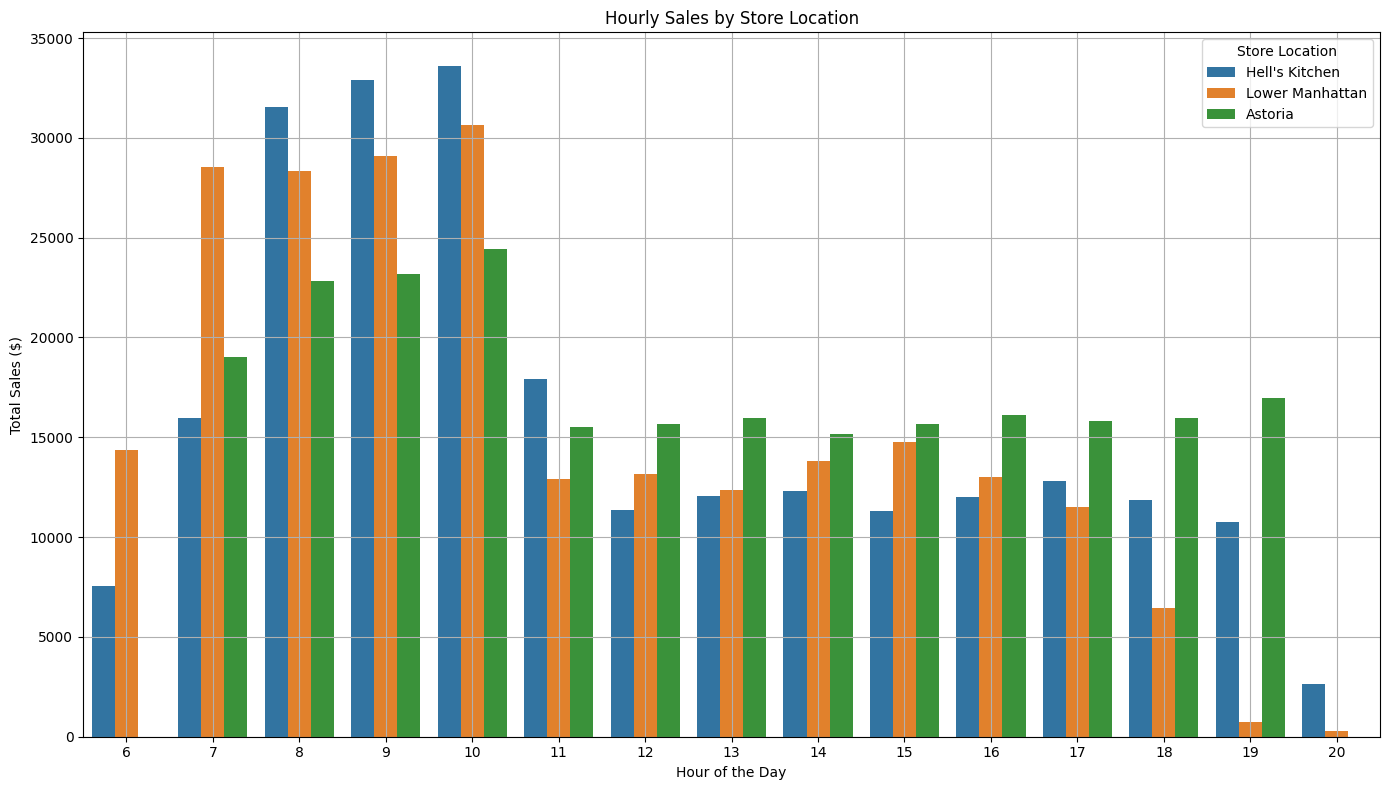

In [108]:
plt.figure(figsize=(14,8))
sns.barplot(data=hourly_sales_by_location , x='Hour', y='Total bill', hue='store_location')

plt.title('Hourly Sales by Store Location')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales ($)')
plt.legend(title='Store Location', loc ='upper right')
plt.grid()
plt.tight_layout()

plt.show()